Data loading

In [4]:
import pandas as pd
data = pd.read_csv('wellness_business_dataset.csv')
data

,Sales_Amount,Customer_Age,Transaction_Count,Product_Category,Region,Repeat_Customer,Income_Level,Customer_Lifetime_Value,Annual_Spend,Average_Discount_Utilized,Session_Duration_Minutes,Page_Views_per_Session,Ad_Clicks_per_Session,Products_Viewed_per_Session,Subscription_Status
0,109.934283,26,7,B,East,Yes,Low,12483.570770,2331.979201,21.721913,28.158542,4,6,1,Not_Subscribed
1,97.234714,62,3,B,North,Yes,Medium,9308.678494,797.044299,24.966395,18.698213,4,2,5,Not_Subscribed
2,112.953771,26,6,B,East,No,Medium,13238.442690,2069.692403,28.318823,32.730107,5,0,6,Subscribed
3,130.460597,43,2,C,North,No,Medium,17615.149280,999.491445,5.503446,9.253600,5,0,5,Not_Subscribed
4,95.316933,21,4,A,East,No,Low,8829.233126,4137.058445,8.844593,29.080432,6,2,2,Not_Subscribed
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,121.403005,59,4,D,North,No,High,15350.751190,1774.779816,11.714973,36.604600,7,0,2,Not_Subscribed
1996,99.469575,23,4,D,North,No,Medium,9867.393704,2301.407763,17.370649,26.145068,4,9,4,Not_Subscribed
1997,82.362507,36,2,C,North,No,Low,5590.626744,4153.397558,7.152903,9.286228,4,0,2,Subscribed
1998,NaN,20,3,D,West,Yes,Low,9184.665180,562.379612,18.978416,41.677419,3,0,3,Not_Subscribed


# Part-1

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 15 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Sales_Amount                 1901 non-null   float64
 1   Customer_Age                 2000 non-null   int64  
 2   Transaction_Count            2000 non-null   int64  
 3   Product_Category             2000 non-null   object 
 4   Region                       2000 non-null   object 
 5   Repeat_Customer              2000 non-null   object 
 6   Income_Level                 2000 non-null   object 
 7   Customer_Lifetime_Value      1900 non-null   float64
 8   Annual_Spend                 2000 non-null   float64
 9   Average_Discount_Utilized    2000 non-null   float64
 10  Session_Duration_Minutes     2000 non-null   float64
 11  Page_Views_per_Session       2000 non-null   int64  
 12  Ad_Clicks_per_Session        2000 non-null   int64  
 13  Products_Viewed_pe

The dataset contains 2,000 rows and 15 columns. From the above information, it can be observed that 'Sales_Amount' contains 1901 non-null rows and 'Customer_Lifetime_Value' contains 1900 non-null rows. Rest of the columns do not contain any null value.

Furthuremore, it can be seen that all the continious variables are either float64 or int64  type whereas all the categorical columns are object types. Hence, the data types are appropriately assigned.

Handling missing values: For Sales_Amount and Customer_Lifetime_Value, missing values are filled with their median values


In [7]:
sales_amount_median = data['Sales_Amount'].median()
customer_lifetime_value_median = data['Customer_Lifetime_Value'].median()

data['Sales_Amount'].fillna(sales_amount_median, inplace=True)
data['Customer_Lifetime_Value'].fillna(customer_lifetime_value_median, inplace=True)

missing_values_after = data.isnull().sum()

missing_values_after

Sales_Amount                   0
Customer_Age                   0
Transaction_Count              0
Product_Category               0
Region                         0
Repeat_Customer                0
Income_Level                   0
Customer_Lifetime_Value        0
Annual_Spend                   0
Average_Discount_Utilized      0
Session_Duration_Minutes       0
Page_Views_per_Session         0
Ad_Clicks_per_Session          0
Products_Viewed_per_Session    0
Subscription_Status            0
dtype: int64

Now, there are no missing values across all columns.

Identifying outliers using IQR method for the continious variables.

In [13]:
# Identifying outliers using IQR method
data_continious = data[['Sales_Amount', 'Customer_Age', 'Transaction_Count', 'Customer_Lifetime_Value', 'Annual_Spend', 'Average_Discount_Utilized', 'Session_Duration_Minutes', 'Page_Views_per_Session', 'Ad_Clicks_per_Session', 'Products_Viewed_per_Session']]
Q1 = data_continious.quantile(0.25)
Q3 = data_continious.quantile(0.75)
IQR = Q3 - Q1

# Determining the threshold for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Finding the number of outliers in each column
outliers_count = ((data_continious < lower_bound) | (data_continious > upper_bound)).sum()

outliers_count[outliers_count > 0]

Sales_Amount                   32
Transaction_Count              19
Customer_Lifetime_Value        28
Session_Duration_Minutes        8
Page_Views_per_Session          2
Ad_Clicks_per_Session          15
Products_Viewed_per_Session    35
dtype: int64

The following outliers are found:
- Ad_Clicks_per_Session: 15 outliers
- Customer_Lifetime_Value: 28 outliers
- Page_Views_per_Session: 2 outliers
- Products_Viewed_per_Session: 35 outliers
- Sales_Amount: 32 outliers
- Session_Duration_Minutes: 8 outliers
- Transaction_Count: 19 outliers

Capping outliers at the upper and lower bounds for each column

In [14]:
numeric_columns_with_outliers = [
    'Ad_Clicks_per_Session', 'Customer_Lifetime_Value', 'Page_Views_per_Session', 
    'Products_Viewed_per_Session', 'Sales_Amount', 'Session_Duration_Minutes', 
    'Transaction_Count'
]

for col in numeric_columns_with_outliers:
    data[col] = data[col].clip(lower=lower_bound[col], upper=upper_bound[col])

# Checking the summary statistics again to see the effect of capping on numeric columns
summary_after_capping_corrected = data[numeric_columns_with_outliers].describe()

summary_after_capping_corrected

,Ad_Clicks_per_Session,Customer_Lifetime_Value,Page_Views_per_Session,Products_Viewed_per_Session,Sales_Amount,Session_Duration_Minutes,Transaction_Count
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,2.039500,10194.154143,5.065000,3.912000,100.910609,29.563097,4.946750
std,1.407811,4751.201252,2.318504,1.853638,19.023988,10.217521,2.164343
min,0.000000,-2194.845592,0.000000,0.000000,52.025625,1.149759,0.000000
25%,1.000000,7037.942460,3.000000,3.000000,88.468487,22.536795,3.000000
50%,2.000000,10183.167575,5.000000,4.000000,100.928731,29.479764,5.000000
75%,3.000000,13193.134495,7.000000,5.000000,112.763729,36.794819,6.000000
max,6.000000,22425.922547,13.000000,8.000000,149.206591,58.181855,10.500000


Given the data quality assessment, the dataset appears to be in good shape for analysis, with missing values addressed and outliers managed.

# Part-2

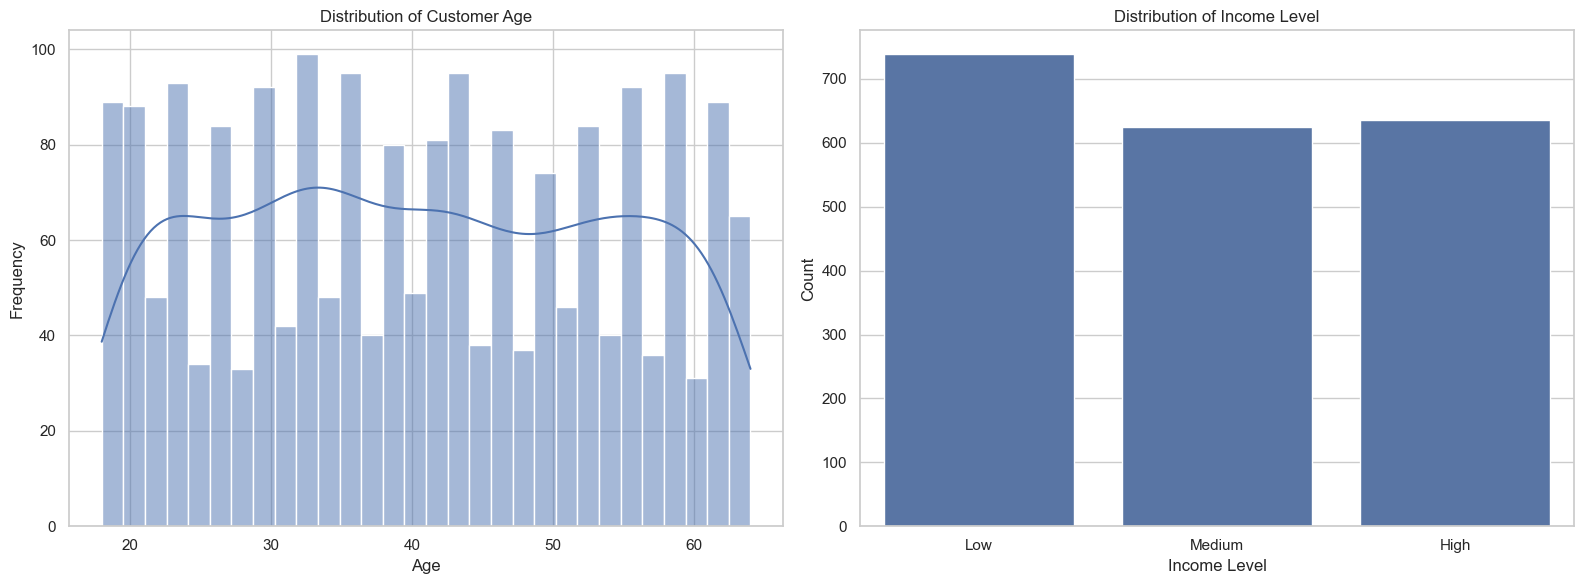

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

# Setting the aesthetic style of the plots
sns.set(style="whitegrid")

# 1. Demographic Distribution: Age and Income Level
fig, ax = plt.subplots(1, 2, figsize=(16, 6))

# Distribution of Customer Age
sns.histplot(data['Customer_Age'], bins=30, kde=True, ax=ax[0])
ax[0].set_title('Distribution of Customer Age')
ax[0].set_xlabel('Age')
ax[0].set_ylabel('Frequency')

# Distribution of Income Level
sns.countplot(x='Income_Level', data=data, order=['Low', 'Medium', 'High'], ax=ax[1])
ax[1].set_title('Distribution of Income Level')
ax[1].set_xlabel('Income Level')
ax[1].set_ylabel('Count')

plt.tight_layout()
plt.show()


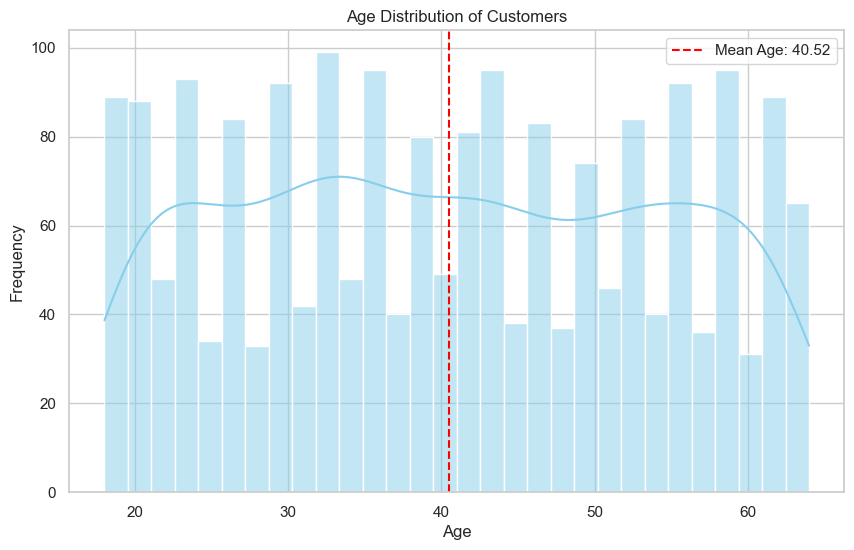

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the aesthetic style of the plots
sns.set_style("whitegrid")

# Age Distribution of Customers
plt.figure(figsize=(10, 6))
sns.histplot(data['Customer_Age'], bins=30, kde=True, color="skyblue")
plt.title('Age Distribution of Customers')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.axvline(data['Customer_Age'].mean(), color='red', linestyle='--', label=f"Mean Age: {data['Customer_Age'].mean():.2f}")
plt.legend()
plt.show()

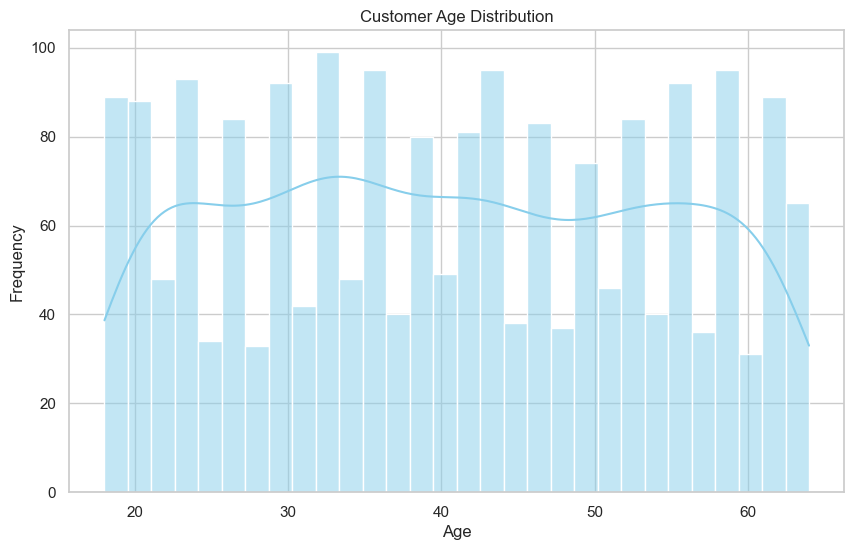

In [17]:
# Retry Customer Age Distribution plot
plt.figure(figsize=(10, 6))
sns.histplot(data['Customer_Age'], bins=30, kde=True, color='skyblue')
plt.title('Customer Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()


In [23]:
# Descriptive statistics summary for numerical and categorical data
categorical_columns = ['Product_Category', 'Region', 'Repeat_Customer', 'Income_Level', 'Subscription_Status']
numerical_summary = data.describe()
categorical_summary = data[categorical_columns].describe()

In [25]:
data[categorical_columns].describe()

,Product_Category,Region,Repeat_Customer,Income_Level,Subscription_Status
count,2000,2000,2000,2000,2000
unique,4,4,2,3,2
top,A,North,No,Low,Subscribed
freq,530,536,1011,739,1008
